In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

In [4]:
import pickle

In [ ]:
dados = pd.read_csv('mlops-deploy\data\processed\casas.csv')

<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
C:\Users\adans\AppData\Local\Temp\ipykernel_28324\158876422.py:1: SyntaxWarning: invalid escape sequence '\c'
  dados = pd.read_csv('..\casas.csv')


In [6]:
dados.head()

,tamanho,ano,garagem,preco
0,159.0,2003,2,208500
1,117.0,1976,2,181500
2,166.0,2001,2,223500
3,160.0,1915,3,140000
4,204.0,2000,3,250000


In [7]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   tamanho  1460 non-null   float64
 1   ano      1460 non-null   int64  
 2   garagem  1460 non-null   int64  
 3   preco    1460 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 45.8 KB


In [8]:
dados.describe()

,tamanho,ano,garagem,preco
count,1460.000000,1460.000000,1460.000000,1460.000000
mean,140.795205,1971.267808,1.767123,180921.195890
std,48.822992,30.202904,0.747315,79442.502883
min,31.000000,1872.000000,0.000000,34900.000000
25%,105.000000,1954.000000,1.000000,129975.000000
50%,136.000000,1973.000000,2.000000,163000.000000
75%,165.000000,2000.000000,2.000000,214000.000000
max,524.000000,2010.000000,4.000000,755000.000000


In [9]:
dados['garagem'].unique()

array([2, 3, 1, 0, 4])

In [10]:
dados.query('tamanho')

,tamanho,ano,garagem,preco
159,229.0,2005,2,320000
117,105.0,2006,2,155000
166,173.0,1955,1,190000
160,114.0,1984,2,162500
204,119.0,1947,1,110000
...,...,...,...,...
153,116.0,1960,2,235000
193,159.0,2004,2,130000
217,123.0,1925,1,107000
100,150.0,1977,2,205000


In [11]:
dados['log_tamanho'] = np.log(dados['tamanho'])

Text(0.5, 1.0, 'Histograma do tamanho das residencias')

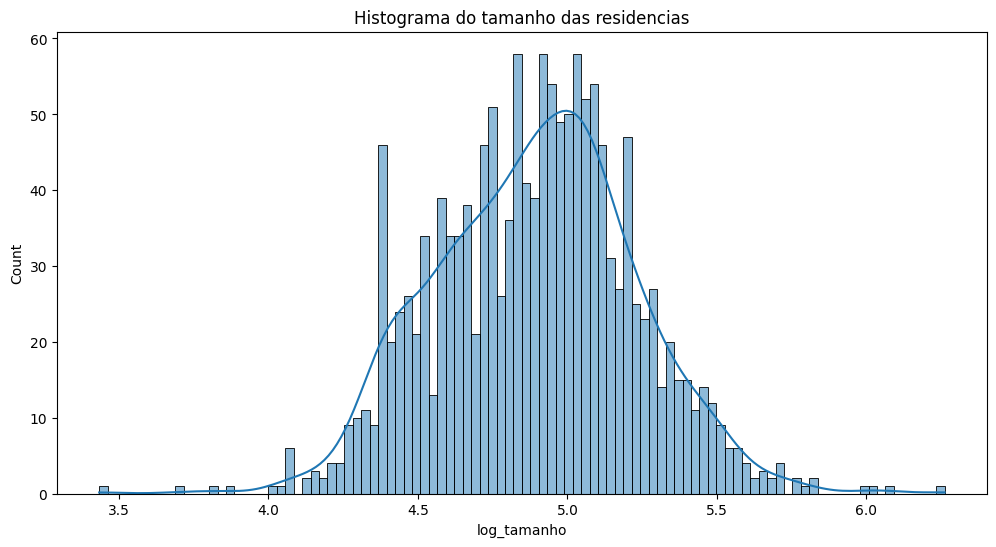

In [12]:
fig, ax = plt.subplots(figsize = (12,6))
ax = sns.histplot(data = dados, x = 'log_tamanho', bins = 100, kde = True)
ax.set_title('Histograma do tamanho das residencias')


In [13]:
X = dados[['tamanho', 'ano', 'garagem']]
y = dados['preco']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [14]:
modelo = LinearRegression()

In [15]:
modelo.fit(X_train, y_train)

LinearRegression()

In [16]:
y_pred = modelo.predict(X_test)

In [17]:
modelo.score(X_test, y_test)

0.7057208007611805

In [18]:
rmse = mse(y_test, y_pred)**0.5
print(f'RMSE: {rmse}')

RMSE: 39424.962043994514


In [19]:
modelo.predict([[100, 2010, 1]])[0]

c:\Users\adans\Documents\Alura\MLOps\Machine Learning e API's\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(156146.3855810659)

In [20]:
pickle.dump(modelo, open('modelo.sav', 'wb'))